<a href="https://colab.research.google.com/github/sikandarmir/DeepLearning/blob/main/Nueral_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network For Handwritten Digits Classification

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
#load mnist dataset from keras
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
len(X_train) #Lenght of Train data

60000

In [103]:
len(X_test) #Length of Test data

10000

In [104]:
X_train.shape #Shape of Train data

(60000, 28, 28)

In [105]:
X_test.shape #Shape of Test data

(10000, 28, 28)

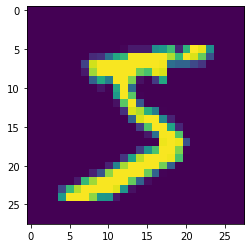

In [106]:
#Show image from train data
# plt.matshow(X_train[0]) 

plt.imshow(X_train[0])

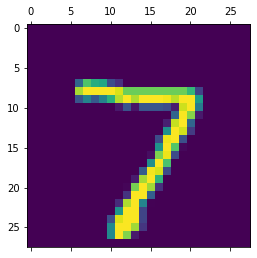

In [107]:
#Show image from test data
plt.matshow(X_test[0])

In [108]:
#Lenght of Y Train data
len(y_train)

60000

In [109]:
#lenght of Test data
len(y_test)

10000

In [110]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [111]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [112]:
X_train = X_train / 255
X_test = X_test / 255

In [113]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [177]:
print(X_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000,)


In [115]:
#Convert array From 2D to 1D 
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [116]:
X_train_flattened.shape

(60000, 784)

In [224]:

#  Model Buliding 
model = keras.Sequential([
    keras.layers.Dense(8, input_shape=(784,), activation='relu'),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [225]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [226]:
history=model.fit(X_train_flattened, y_train, epochs=20, batch_size=32,validation_data=(X_test_flattened, y_test))


Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9887 - accuracy: 0.7091 - val_loss: 0.4803 - val_accuracy: 0.8732
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5362 - accuracy: 0.8371 - val_loss: 0.3854 - val_accuracy: 0.8932
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4779 - accuracy: 0.8516 - val_loss: 0.3594 - val_accuracy: 0.9000
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4489 - accuracy: 0.8627 - val_loss: 0.3474 - val_accuracy: 0.9021
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4299 - accuracy: 0.8673 - val_loss: 0.3317 - val_accuracy: 0.9057
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4172 - accuracy: 0.8721 - val_loss: 0.3278 - val_accuracy: 0.9071
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4044 - accuracy: 0.8760 - val_loss: 0.3281 - val_accuracy:

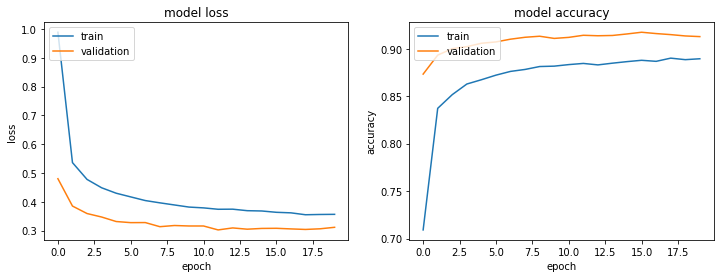

In [227]:
fig, axs = plt.subplots(1,2, figsize=(12,4))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title('model loss')
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'validation'], loc='upper left')

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].set_title('model accuracy')
axs[1].set_ylabel('accuracy')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'validation'], loc='upper left')

plt.show()

In [228]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3116 - accuracy: 0.9127


[0.3116251230239868, 0.9126999974250793]

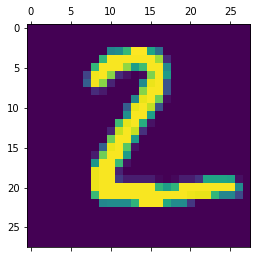

In [229]:
plt.matshow(X_test[1])

In [236]:
test_predictions = model.predict(X_test_flattened)
test_predictions.shape

(10000, 10)

In [231]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_classes_M = np.argmax(test_predictions,axis=1)
cm = confusion_matrix(y_test, test_classes_M)


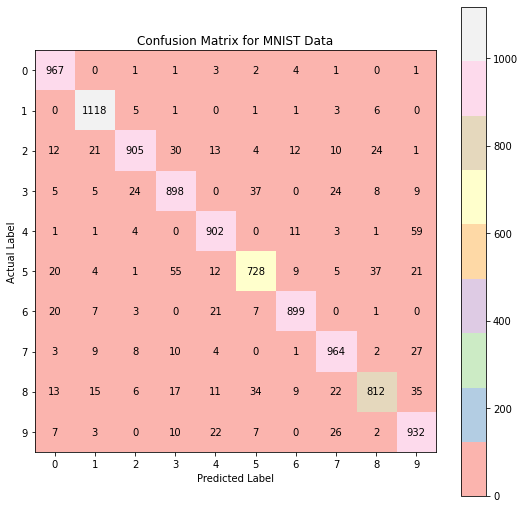

In [232]:
plt.figure(figsize=(9,9))
plt.imshow(cm, cmap='Pastel1')
plt.title('Confusion Matrix for MNIST Data')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.colorbar()

width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y,x), horizontalalignment='center', verticalalignment='center')

In [233]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_classes_M))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       980
           1       0.95      0.99      0.96      1135
           2       0.95      0.88      0.91      1032
           3       0.88      0.89      0.88      1010
           4       0.91      0.92      0.92       982
           5       0.89      0.82      0.85       892
           6       0.95      0.94      0.94       958
           7       0.91      0.94      0.92      1028
           8       0.91      0.83      0.87       974
           9       0.86      0.92      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

